In [1]:
import numpy as np
from spec_id import Gen_sim, Scale_model
from scipy.interpolate import interp1d, interp2d
from astropy.cosmology import Planck13 as cosmo
from astropy.io import ascii
from astropy.table import Table
import rpy2
import rpy2.robjects as robjects
R = robjects.r
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [26]:
def Delayed_tau(age,tau):
    return age * np.exp(-age/tau)

def Age_distro(age,tau):
    return (max(age)-age) * np.exp(age/tau)

def Avg_age(age,tau):
    top = tau*np.exp(age/tau)*(age - 2*tau) + 2*tau**2 + age * tau
    bottom =tau*np.exp(age/tau) - tau - age
    return top / bottom

In [4]:
ages  = np.arange(0.0,6.01,.01)

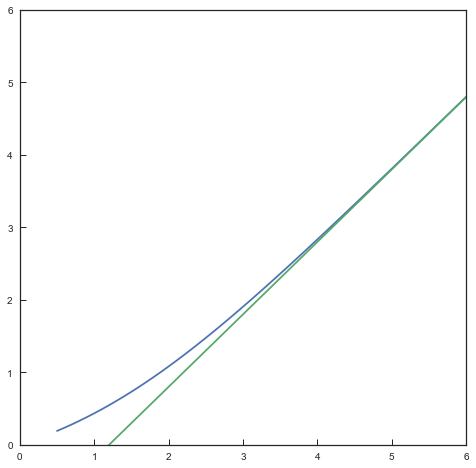

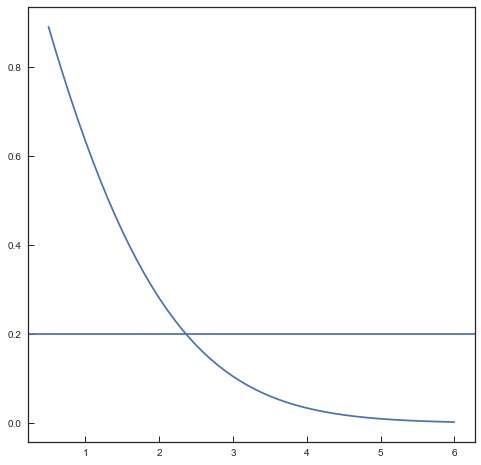

In [47]:
%matplotlib inline

TAU = .6

plt.figure(figsize=[8,8])
plt.plot(age,Avg_age(age,TAU))
plt.plot(age,age-TAU*2)
plt.ylim(0,6)
plt.xlim(0,6)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(age,Avg_age(age,TAU)-(age-TAU*2))
plt.axhline(.2)
plt.show()
plt.close()

In [ ]:
%matplotlib inline

print prob.T.shape

ultau = np.append(0, np.power(10, np.array(tau)[1:] - 9))

print ultau

for i in range(len(tau)-1):
    Me = []
    for ii in range(len(metal)):
        Ag = []
        for iii in range(len(age)):
            Ag.append(np.trapz(prob.T[ii][iii][:i+2],ultau[:i+2]))
        Me.append(Ag)
    
    
    Me= np.array(Me)
        
    Age=[]
    for ii in range(len(Me.T)):
        Age.append(np.trapz(Me.T[ii],metal))
    #   
    Cp=np.trapz(Age,age)

    Pr=Me.T/Cp

    x=np.argwhere(Pr==np.max(Pr))

    print x
    bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

    onesig,twosig=Likelihood_contours(age,metal,Pr)
    levels=np.array([twosig,onesig])
    print levels    

    plt.figure(figsize=[8,8])
    plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
    plt.contourf(M,A,Pr,40,cmap=colmap)
    plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)')
    plt.ylabel('Age (Gyrs)')
    plt.legend()
    plt.show()
    plt.close()

NameError: name 'prob' is not defined

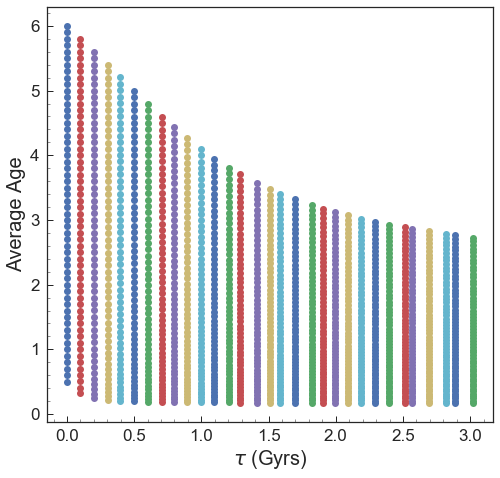

In [29]:
%matplotlib inline

ultau=np.append(0,np.power(10, np.array(tau)[1:] - 9))

treshape=[]
plt.figure(figsize=[8,8])
plt.plot(np.repeat(0, len(age)), age, 'o')
for i in range(len(tau)):
    Avage=Avg_age(age,ultau[i])
    treshape.append(Avage)
    plt.plot(np.repeat(ultau[i], len(age)), Avage, 'o')
plt.tick_params(axis='both', which='major', labelsize=17)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
plt.xlabel('$\\tau$ (Gyrs)',size=20)
plt.ylabel('Average Age',size=20)
plt.show()
plt.close()

dat=Table(treshape,names=np.array(tau).astype(str))

# print dat
ascii.write(dat,'../data/tau_scale_delayed.dat')

In [51]:
print metal

[ 0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009  0.01   0.011
  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019  0.02   0.021
  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029  0.03 ]
